In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Display options
np.set_printoptions(precision=4)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans serif"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# Local imports
import sys
sys.path.append("modules/")
import importlib
import gmm_data
import compile_results
importlib.reload(compile_results);

# Figure 2A

Processing N = 100
Will load data from data/nestedGMM_D=1_N=100_alpha=0.50_sd=2.00_sd0=10.00_K=10_seed=0.pkl
Loaded data has shape (100, 1)
Loading estimates from figure2_results/nestedGMM_D=1_N=100_alpha=0.50_sd=2.00_sd0=10.00_K=10_seed=0/sd=2.00_sd0=3.00_alpha=1.00/coupled_estimates_totRep=10000_hType=predictive_initType=crp_prior_maxTime=50_burnin=10_minIter=100.npz
Finished loading estimates
Number of unsuccessful replicates out of total is 0 / 10000
Will save figure to figure2_results/nestedGMM_D=1_N=100_alpha=0.50_sd=2.00_sd0=10.00_K=10_seed=0/sd=2.00_sd0=3.00_alpha=1.00/coupled_estimates_hType=predictive_initType=crp_prior_maxTime=50_burnin=10_minIter=100.png


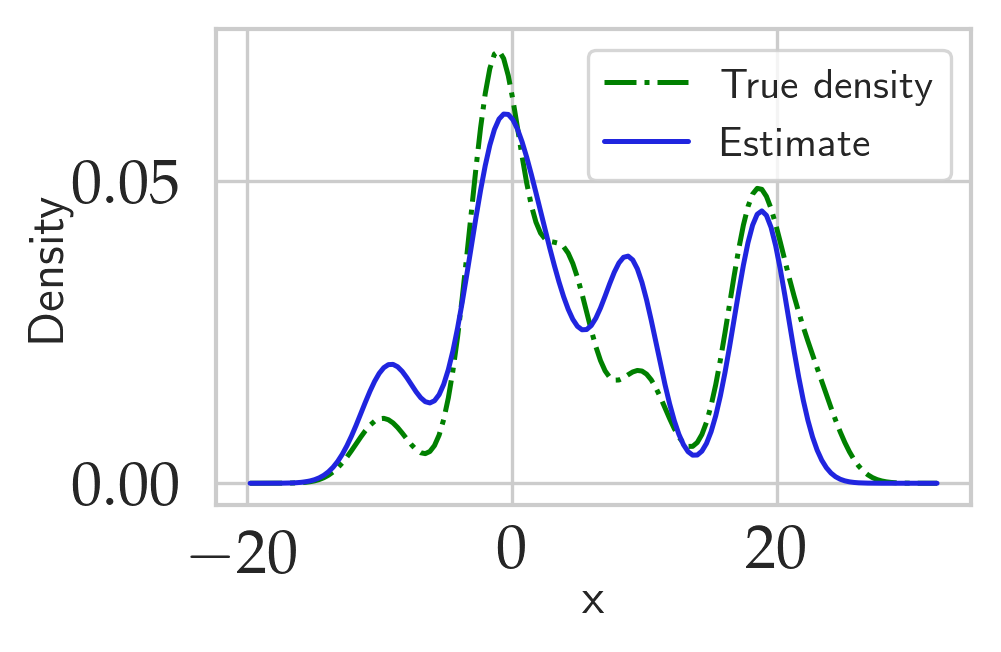

In [2]:
data_dir = "data/"
results_dir="figure2_results/"
data_type="gmm"
D=1
data_sd=2.0
data_sd0=10.0
data_K=10
data_alpha=0.5
data_seed=0
sd=2.0
sd0=3.0
k = 10 # burn-in
m = 100 # minimum iterations
alpha=1
is_nested=True
num_reps = 100
pool_size = 100
tot_reps = num_reps*pool_size
ext = "npz"

init_type="crp_prior"
h_type = "predictive"

Ntime_list = [(100,50)]
print_title = False
for x in Ntime_list:
    Ndata = x[0]
    max_time = x[1]
    print("Processing N = %d" %Ndata)
    savedirroot = results_dir + gmm_data.make_experiment_name(Ndata, D, data_sd, 
                                                          data_sd0, data_alpha, data_K, 
                                                          data_seed, is_nested, sd, sd0, alpha)

    data, true_density = gmm_data.load_gmm_data(data_dir, D, Ndata, data_alpha, data_sd, data_sd0, data_K, data_seed, is_nested)
    compile_results.report_predictive_density(Ndata, tot_reps, savedirroot, true_density, init_type, max_time, k, m, print_title, ext)

# Figure 2B

In [3]:
def load_ests(fn, k=0):
    ests = []
    with open(fn, 'r') as f:
        for l in f: ests.append(float(l.split("\t")[0]))
    return ests

coupled_ests_fn = "./data/all_coupled_ests.tsv"
coupled_ests = load_ests(coupled_ests_fn)
single_ests_fn = "./data/all_single_ests.tsv"
single_ests = load_ests(single_ests_fn)

In [4]:
# set true value computed from long MCMC chains
true_val = 0.32070

In [5]:
def mean_and_se_by_n_procs(ests, n_proc_vals):
    """
    
    Returns:
        ests, SE's
    """
    means, SEs = [], []
    for n_proc_val in n_proc_vals:
        means.append(np.mean(ests[:n_proc_val]))
        SEs.append(stats.sem(ests[:n_proc_val]))
    
    means, SEs = np.array(means), np.array(SEs)
    return means, SEs

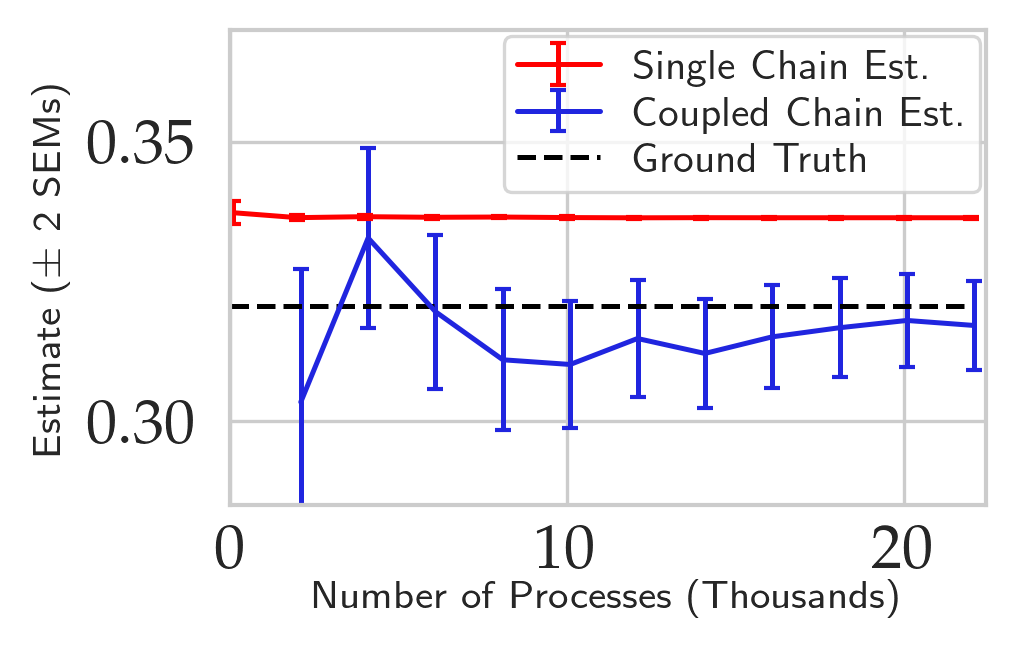

In [6]:
# Plot
plt.figure(figsize=[3.25, 2.1])
x_eps = 100
max_procs, step = 22000, 2000
proc_units_for_axis = 1000
n_proc_vals = [100] + list(np.array(np.linspace(step, max_procs, (max_procs/step)), dtype=int))
n_proc_vals = np.array(n_proc_vals)
single_est_means, single_SEs = mean_and_se_by_n_procs(single_ests, n_proc_vals)
plt.errorbar(x=n_proc_vals/proc_units_for_axis, y=single_est_means, yerr=2*single_SEs, 
             label=r"Single Chain Est.",capsize=2., c='red')

n_proc_vals = list(np.array(np.linspace(step, max_procs, (max_procs/step)), dtype=int))
n_proc_vals = np.array(n_proc_vals)
coupled_est_means, coupled_SEs = mean_and_se_by_n_procs(coupled_ests, n_proc_vals)
plt.errorbar(x=(n_proc_vals+x_eps)/proc_units_for_axis, y=coupled_est_means, yerr=coupled_SEs,
             label=r"Coupled Chain Est.", capsize=2., c='#2025df') # same color as earlier plot

# Ground truth
plt.hlines(y=true_val, xmin=0, xmax=max_procs/proc_units_for_axis, label=r"Ground Truth", linestyle='--')


plt.xlabel(r"Number of Processes (Thousands)", labelpad=-0.5)
plt.ylim([0.285,0.37])
plt.xlim([0, max(n_proc_vals)*1.02/proc_units_for_axis])
plt.ylabel(r"Estimate ($\pm $ 2 SEMs)")
labels, handles = plt.gca().get_legend_handles_labels()
new_order = [1, 2, 0]
labels, handles = [labels[i] for i in new_order], [handles[i] for i in new_order]
plt.legend(labels, handles, fontsize=10, loc='upper right',
          bbox_to_anchor=(1.02,1.03), labelspacing=0.2, borderpad=0.3)
ax = plt.gca()
ax.tick_params(axis='x', pad=-0.1)

plt.show()